# Imports

In [1]:
!pip install --upgrade pyalgotrading

In [2]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [3]:
connection = AlgoBullsConnection()

In [4]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [5]:
API_TOKEN = "c3477e22990b004e542ac6eaee59d3cc961816f5"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyalgostrategypool

In [6]:
! wget -O obv_breakout_us.py https://raw.githubusercontent.com/Sriramg89/pyalgostrategypool/master/pyalgostrategypool/obv_breakout/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' obv_breakout_us.py

--2024-12-26 21:02:43--  https://raw.githubusercontent.com/Sriramg89/pyalgostrategypool/master/pyalgostrategypool/obv_breakout/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2668 (2.6K) [text/plain]
Saving to: 'obv_breakout_us.py'

obv_breakout_us.py  100%[===================>]   2.61K  --.-KB/s    in 0s      

2024-12-26 21:02:44 (39.1 MB/s) - 'obv_breakout_us.py' saved [2668/2668]

sed: 1: "obv_breakout_us.py": invalid command code o


In [7]:
from obv_breakout_us import OBVBreakout as strategy_cls

In [8]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 160114,
 'strategyId': '7a06346007e447ac90722b5d9388d1f7'}

In [9]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [10]:
instrument = connection.search_instrument('TSLA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:TSLA'

## Setup Parameters

In [11]:
parameters = {
  'TIME_PERIOD': 14  # Time period for OBV and its SMA (can be adjusted based on your strategy's needs)
}

In [12]:
initial_virtual_funds = 4000     # in dollars


## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400',  # Start at midnight
    end='2023-07-31 15:30 -0400',    # End at end of the day
    instrument='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',                   # Use daily candles
    initial_funds_virtual=initial_virtual_funds
)



Starting the strategy 'OBV Breakout' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ OBV Breakout              │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:TSLA']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 14}       │
├─────────────────────────┼────────────────

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (2)

In [16]:
print(logs)

[2024-12-26 21:02:59] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-12-26 21:02:59] Sanity checks on cfg successful.
[2024-12-26 21:02:59] Currency set to "USD"
[2024-12-26 21:02:59] Setting up broker connection...
[2024-12-26 21:03:00] Starting ALPACAV2 in PAPER mode...
[2024-12-26 21:03:01] Broker connection has been setup successfully.
[2024-12-26 21:03:01] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2024-12-26 21:03:01] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-12-26 21:03:01] Welcome ALGOBULLS VIRTUAL USER!
[2024-12-26 21:03:01] Reading strategy...
[2024-12-26 21:03:01] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...

          #####  #######    #    ######  ####### ### #     #  #####
         

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,TSLA,2021-08-03 10:30:00-04:00,SELL,5,$,708.07,,2021-08-03 15:30:00-04:00,BUY,5,$,710.00,,-9.65,-9.65,0,-9.65
1,NASDAQ,TSLA,2021-08-04 11:30:00-04:00,BUY,5,$,719.42,,2021-08-04 15:30:00-04:00,SELL,5,$,716.39,,-15.15,-24.80,0,-15.15
2,NASDAQ,TSLA,2021-08-05 10:30:00-04:00,SELL,5,$,714.39,,2021-08-05 11:30:00-04:00,BUY,5,$,718.54,,-20.75,-45.55,0,-20.75
3,NASDAQ,TSLA,2021-08-05 11:30:00-04:00,BUY,5,$,718.54,,2021-08-05 15:30:00-04:00,SELL,5,$,719.76,,6.10,-39.45,0,6.10
4,NASDAQ,TSLA,2021-08-06 09:30:00-04:00,SELL,5,$,711.71,,2021-08-06 15:30:00-04:00,BUY,5,$,704.00,,38.55,-0.90,0,38.55
5,NASDAQ,TSLA,2021-08-09 10:30:00-04:00,BUY,5,$,714.41,,2021-08-09 15:30:00-04:00,SELL,5,$,713.73,,-3.40,-4.30,0,-3.40
6,NASDAQ,TSLA,2021-08-10 10:30:00-04:00,SELL,5,$,706.10,,2021-08-10 11:30:00-04:00,BUY,5,$,706.65,,-2.75,-7.05,0,-2.75
7,NASDAQ,TSLA,2021-08-10 11:30:00-04:00,BUY,5,$,706.65,,2021-08-10 15:30:00-04:00,SELL,5,$,711.77,,25.60,18.55,0,25.60
8,NASDAQ,TSLA,2021-08-11 10:30:00-04:00,SELL,5,$,711.05,,2021-08-11 15:30:00-04:00,BUY,5,$,706.09,,24.80,43.35,0,24.80
9,NASDAQ,TSLA,2021-08-13 10:30:00-04:00,SELL,5,$,719.94,,2021-08-13 15:30:00-04:00,BUY,5,$,716.34,,18.00,61.35,0,18.00


## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


                    Strategy
------------------  ------------------------
Start Period        2021-08-03
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -
CAGR﹪              0.29%

Sharpe              0.12
Prob. Sharpe Ratio  55.23%
Sortino             0.17
Sortino/√2          0.12
Omega               1.03

Max Drawdown        -9.45%
Longest DD Days     378

Gain/Pain Ratio     0.03
Gain/Pain (1M)      0.11

Payoff Ratio        1.0
Profit Factor       -
Common Sense Ratio  1.3
CPC Index           0.52
Tail Ratio          1.06
Outlier Win Ratio   1.04
Outlier Loss Ratio  -

MTD                 3.2012128635295623e+70%
3M                  3.9118795704856577e+189%
6M                  -
YTD                 -
1Y                  -
3Y (ann.)           0.29%
5Y (ann.)           0.29%
10Y (ann.)          0.29%
All-time (ann.)     0.29%

Avg. Drawdown       -2.73%
Avg. Drawdown Days  86
Recovery Factor     0.15
Ulcer Index         0.05
Sere

/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             82.0%

Cumulative Return          0.85%
CAGR﹪                     0.29%

Sharpe                     0.12
Prob. Sharpe Ratio         55.22%
Smart Sharpe               0.12
Sortino                    0.17
Smart Sortino              0.16
Sortino/√2                 0.12
Smart Sortino/√2           0.12
Omega                      1.03

Max Drawdown               -9.45%
Longest DD Days            378
Volatility (ann.)          10.22%
Calmar                     0.03
Skew                       0.05
Kurtosis                   9.34

Expected Daily %           0.0%
Expected Monthly %         0.04%
Expected Yearly %          0.28%
Kelly Criterion            1.39%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.05%
Expected Shortfall (cVaR)  -1.05%

Max Consecutive Wins       6
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-14,2022-05-31,2022-07-11,120,-9.450622,-8.964280
2,2022-07-19,2022-12-28,2023-07-31,378,-6.927853,-6.713856
3,2021-09-10,2021-10-01,2022-03-08,180,-3.053299,-2.888899
4,2021-08-04,2021-08-05,2021-08-05,2,-0.899670,-0.746802
5,2021-09-07,2021-09-07,2021-09-07,1,-0.814874,NaN


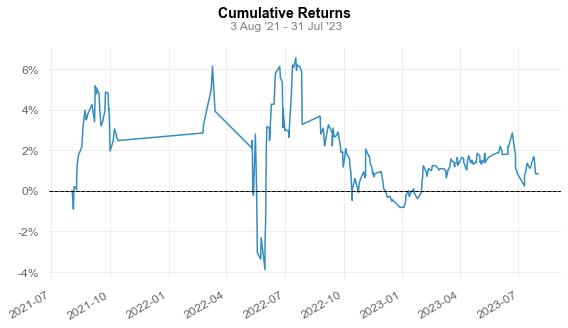

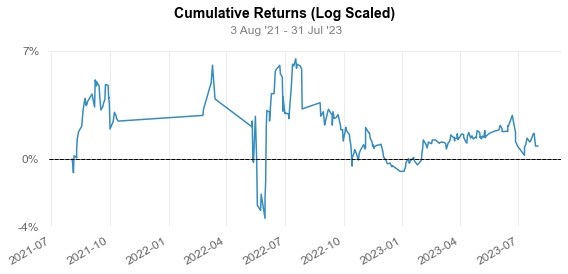

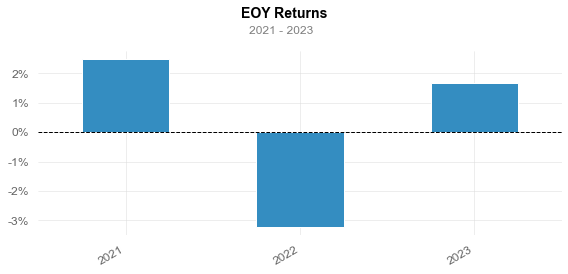

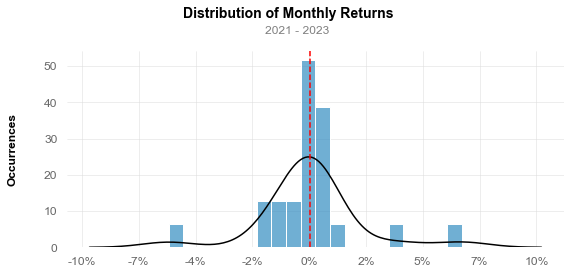

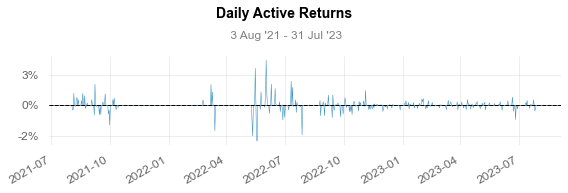

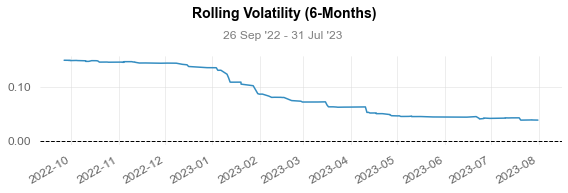

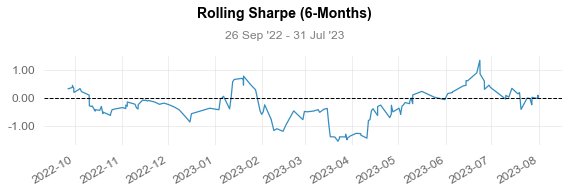

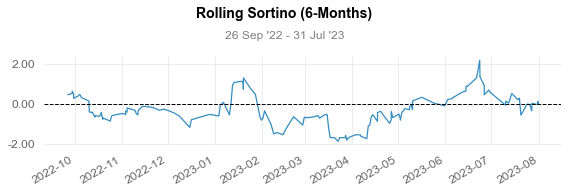

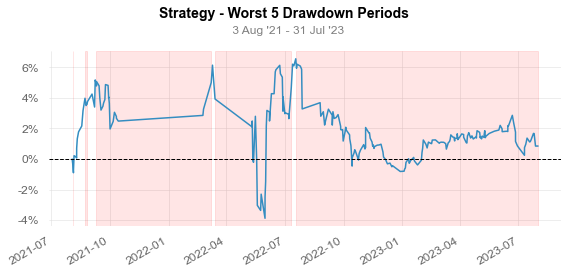

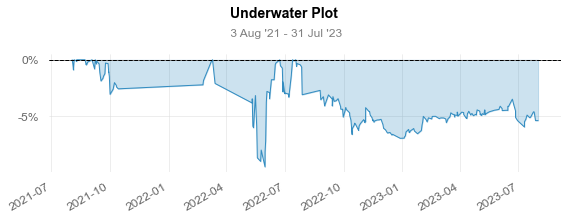

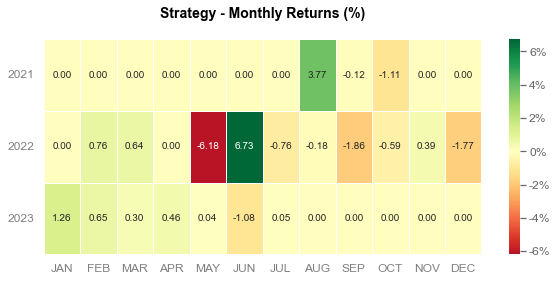

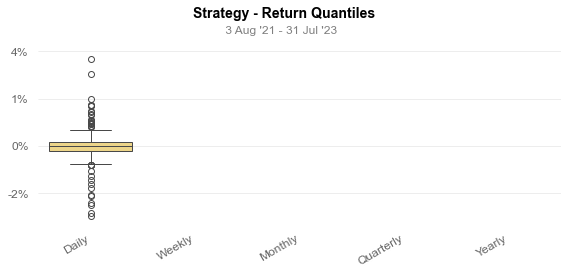

In [20]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=False)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | ac228ef63854447b9ceb9e9ccdce01c7 |
| Transaction Type | BUY                              |
| Instrument       | NASDAQ:TSLA                      |
| Quantity         | 5                                |
| Price            | $266.09                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-12-26T15:36:13.200003Z | COMPLETE               |
| 2024-12-26T15:36:13.199989Z | OPEN                   |
| 2024-12-26T15:36:13.199973Z | OPEN PENDING           |
| 2024-12-26T15:36:13.199956Z | VALIDATION PENDING     |
| 2024-12-26T15:36:13.199912Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | fbc40f644ef0449c8

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [22]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:TSLA', 
    lots=1,
    parameters=parameters, 
    candle='minute'
)


Starting the strategy 'OBV Breakout' in PAPERTRADING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ OBV Breakout              │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ PAPERTRADING              │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:TSLA']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 1                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2024-12-26 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2024-12-26 15:00:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 14}       │
├─────────────────────────┼───────────────

### Status

In [23]:
connection.get_papertrading_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [26]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,net_pnl


### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='60minutes',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)